In [79]:
# Importing the necessary libraries
import numpy as np
import pandas as pd

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
import pickle
import sklearn
import scipy
import seaborn as sns
sns.set()
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [81]:
# Importing the dataset
#Specifies the column number of the column that you want to use as the index as the index, starting with 0.
df = pd.read_csv('Artificial-assignment.csv',index_col = 0)

In [82]:
#  function is used to get the first 10 rows
df.head(10)

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,,,,,,,,
6,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
8,183,64,0,0,23.3,0.672,32,1
1,89,66,23,94,28.1,0.167,21,0
0,137,40,35,168,43.1,2.288,33,1
5,116,74,0,0,25.6,0.201,30,0
3,78,50,32,88,31.0,0.248,26,1
10,115,0,0,0,35.3,0.134,29,0
2,197,70,45,543,30.5,0.158,53,1


In [83]:
# Shape of the data set
df.shape

(768, 8)

In [84]:
# Check for missing values
df.isnull().sum()

Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [85]:
# returns description of the data in the DataFrame.
df.describe()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Outcome', ylabel='count'>

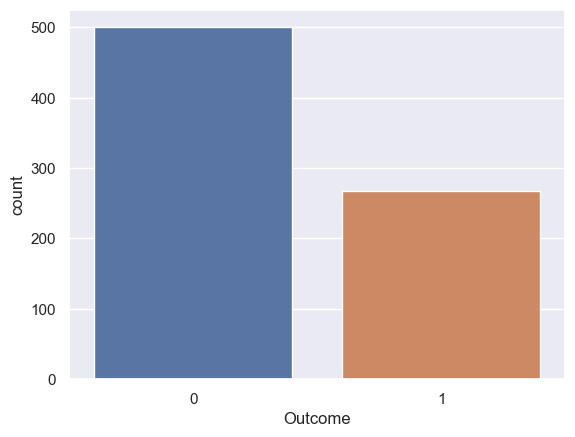

In [86]:
# to see if the dataset is balanced or not
sns.countplot('Outcome',data=df)

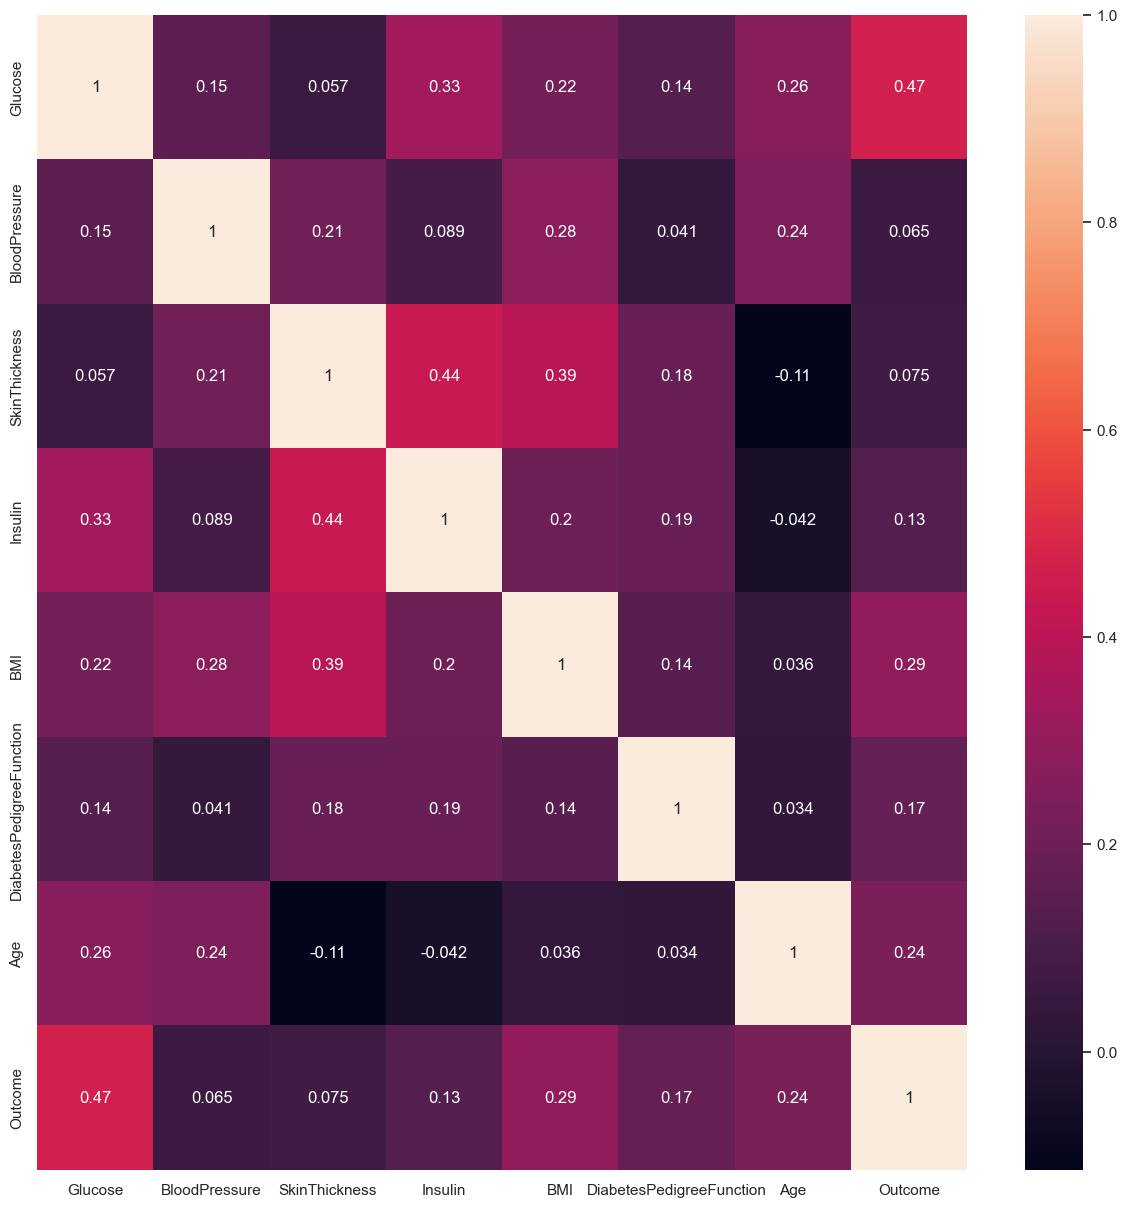

In [87]:
# Heat map
corrmap = df.corr(method = "pearson")
plt.figure(figsize=(15,15))
#ploting the heat map
g=sns.heatmap(corrmap,annot=True)     

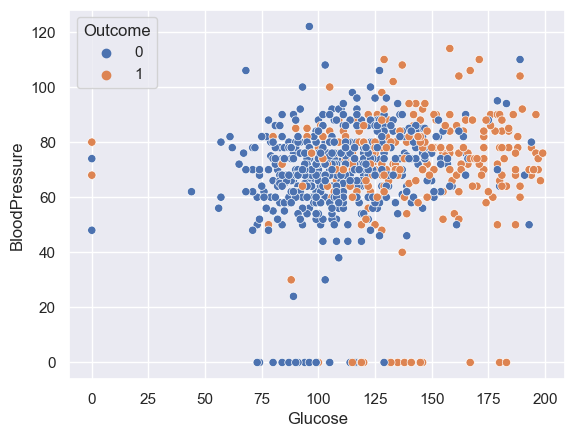

In [88]:
# Scatter plot of Glucose vs Blood Pressure
kp =sns.scatterplot(x= "Glucose" ,y= "BloodPressure",
              hue="Outcome",
              data=df);

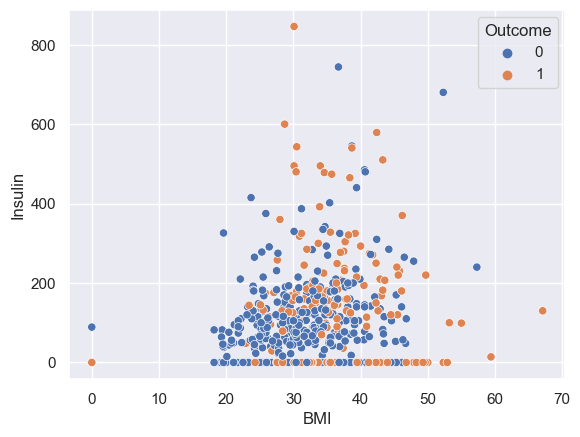

In [89]:
# # Scatter plot of BMI vs Blood Insulin
kp1 =sns.scatterplot(x= "BMI" ,y= "Insulin",
              hue="Outcome",
              data=df);

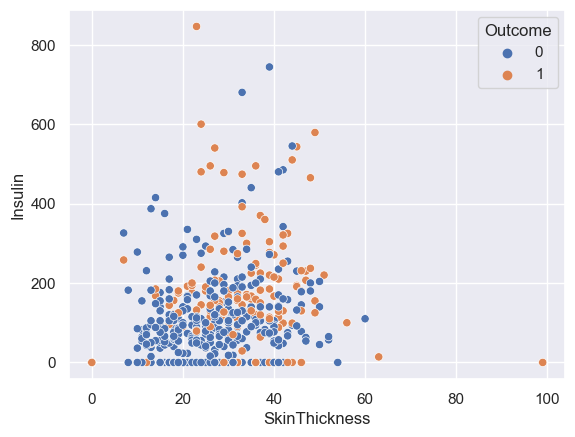

In [90]:
# Scatter plot of Skin Thickness vs Insulin
kp2 =sns.scatterplot(x= "SkinThickness" ,y= "Insulin",
              hue="Outcome",
              data=df);

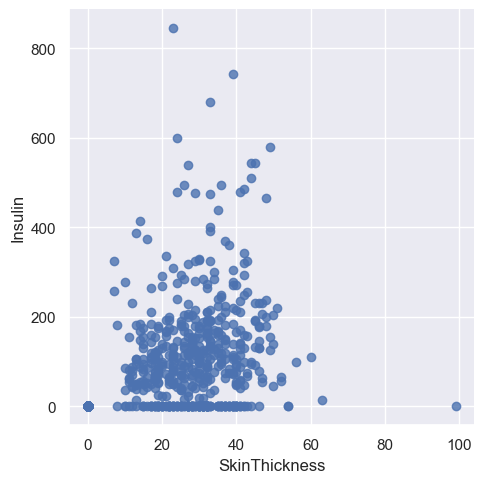

In [91]:
sns.lmplot(x='SkinThickness',y='Insulin',
           data=df, fit_reg=False)

<AxesSubplot:>

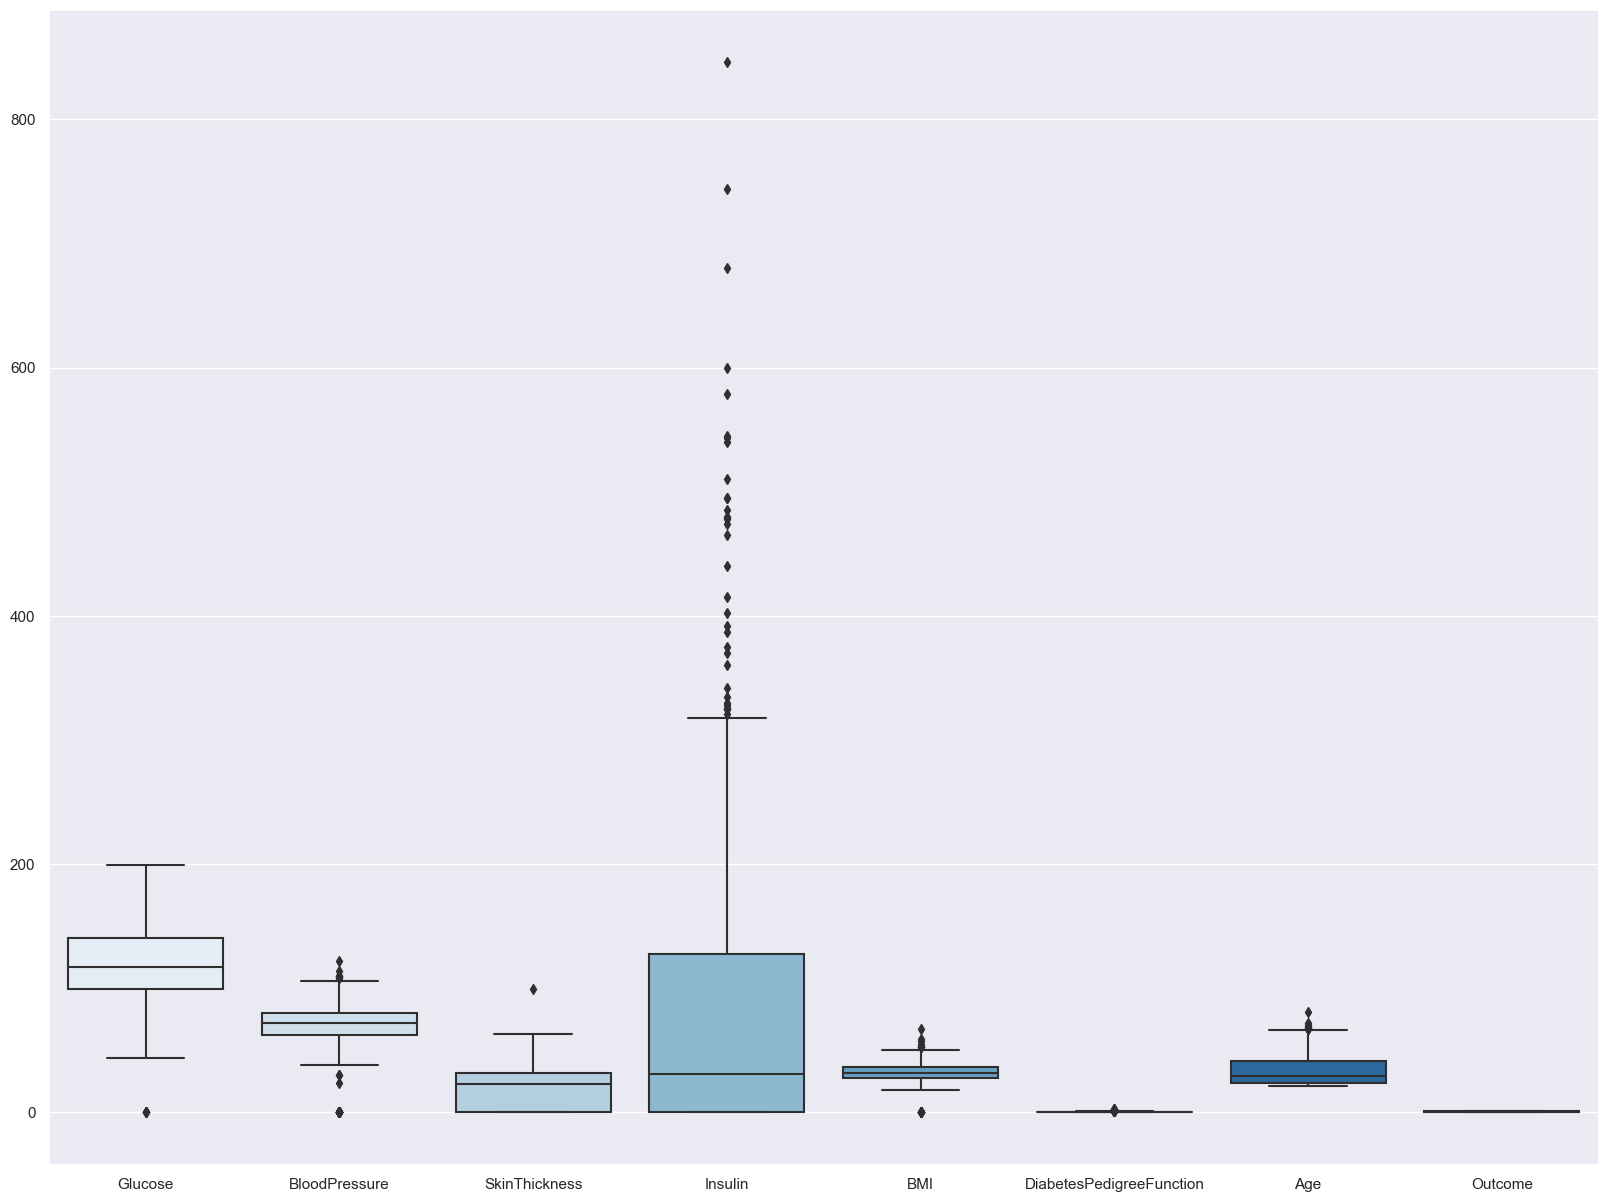

In [92]:
# Box plot to show distributions with respect to categories.
plt.figure(figsize=(20,15))
sns.boxplot(data=df,
          palette="Blues")

In [93]:
# Training the dataset
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

In [94]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [95]:
X.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Pregnancies,,,,,,,
6,148,72,35,0,33.6,0.627,50
1,85,66,29,0,26.6,0.351,31
8,183,64,0,0,23.3,0.672,32
1,89,66,23,94,28.1,0.167,21
0,137,40,35,168,43.1,2.288,33


In [96]:
y.head()

Pregnancies
6    1
1    0
8    1
1    0
0    1
Name: Outcome, dtype: int64

In [97]:
# Splitting the dataset into training and testing

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [98]:
# Support vector machine
# create support vector classifier object by passing argument kernel as the linear kernel. 
# fit the model on train set and perform prediction on the test set.
def svm_classifier(X_train, X_test, y_train, y_test):
    
    classifier_svm = SVC(kernel = 'rbf', random_state = 0)
    classifier_svm.fit(X_train, y_train)

    y_pred = classifier_svm.predict(X_test)

    cm = confusion_matrix(y_test, y_pred)

    return print(f"Train score : {classifier_svm.score(X_train, y_train)}\nTest score : {classifier_svm.score(X_test, y_test)}")

In [99]:
# Random forest classifier
# Train the model using the training sets

def forest_classifier(X_train, X_test, y_train, y_test):
    classifier_forest = RandomForestClassifier(criterion = 'entropy', random_state = 0)
    classifier_forest.fit(X_train, y_train)

    y_pred = classifier_forest.predict(X_test)

    cm = confusion_matrix(y_test, y_pred)

    return print(f"Train score : {classifier_forest.score(X_train, y_train)}\nTest score : {classifier_forest.score(X_test, y_test)}")

In [100]:
# KNN(K-nearest neighbours)

def knn_classifier(X_train, X_test, y_train, y_test):
    
    classifier_knn = KNeighborsClassifier(metric = 'minkowski', p = 2)
    classifier_knn.fit(X_train, y_train)

    y_pred = classifier_knn.predict(X_test)

    cm = confusion_matrix(y_test, y_pred)

    return print(f"Train score : {classifier_knn.score(X_train, y_train)}\nTest score : {classifier_knn.score(X_test, y_test)}")

In [101]:
# Measuring Train Test Split Model Performance

def print_score(X_train, X_test, y_train, y_test):
    print("SVM:\n")
    svm_classifier(X_train, X_test, y_train, y_test)

    print("-"*100)
    print()
    
    print("KNN:\n")
    knn_classifier(X_train, X_test, y_train, y_test)

    print("-"*100)
    print()
    
    print("Random Forest:\n")
    forest_classifier(X_train, X_test, y_train, y_test)

In [102]:
print_score(X_train, X_test, y_train, y_test)

SVM:

Train score : 0.760586319218241
Test score : 0.7922077922077922
----------------------------------------------------------------------------------------------------

KNN:

Train score : 0.7899022801302932
Test score : 0.7402597402597403
----------------------------------------------------------------------------------------------------

Random Forest:

Train score : 1.0
Test score : 0.7857142857142857


In [103]:
# classification algorithms
from sklearn.linear_model import LogisticRegression
svm=SVC(kernel='linear')
knn=KNeighborsClassifier(n_neighbors=3)
rf=RandomForestClassifier(n_estimators=100)

In [104]:
svm.fit(X_train,y_train)
knn.fit(X_train,y_train)
rf.fit(X_train,y_train)

RandomForestClassifier()

In [105]:
y_svm=svm.predict(X_test)
y_knn=knn.predict(X_test)
y_rf=rf.predict(X_test)

In [106]:
svm_cm_test=confusion_matrix(y_test,y_svm)
knn_cm_test=confusion_matrix(y_test,y_knn)
rf_cm_test=confusion_matrix(y_test,y_rf)

In [107]:
from sklearn.metrics import accuracy_score
svm_acc_test=accuracy_score(y_test,y_svm)
knn_acc_test=accuracy_score(y_test,y_knn)
rf_acc_test=accuracy_score(y_test,y_rf)

from sklearn.metrics import accuracy_score
svm_acc_test=accuracy_score(y_test,y_svm)
knn_acc_test=accuracy_score(y_test,y_knn)
rf_acc_test=accuracy_score(y_test,y_rf)

In [108]:
print('Accuracy Scores\n')

print('\n'+'*'*30+'SVM'+'*'*30)
print(svm_acc_test)

print('\n'+'*'*30+'KNearest Neighbour'+'*'*30)
print(knn_acc_test)

print('\n'+'*'*30+'Random Forest Classifier'+'*'*30)
print(rf_acc_test)

Accuracy Scores


******************************SVM******************************
0.8116883116883117

******************************KNearest Neighbour******************************
0.7207792207792207

******************************Random Forest Classifier******************************
0.8181818181818182


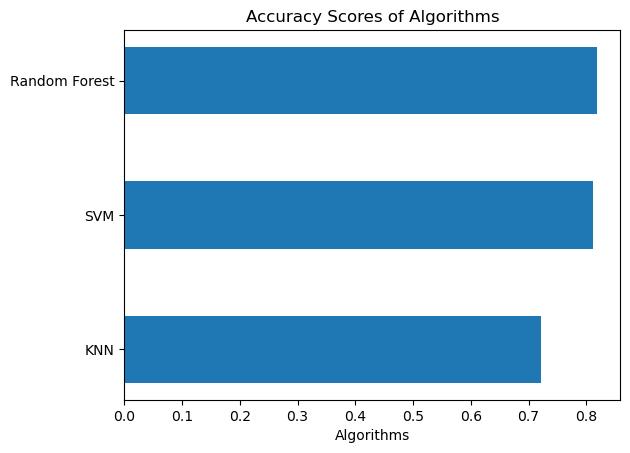

In [109]:
acc_list=[knn_acc_test,svm_acc_test,rf_acc_test]
import matplotlib.pyplot as plt; plt.rcdefaults()
 
objects = ( 'KNN', 'SVM', 'Random Forest')
y_pos = np.arange(len(objects))
performance = acc_list
width = 1/2
plt.barh(y_pos, performance, width,align='center', alpha=1)
plt.yticks(y_pos,objects)
plt.xlabel('Accuracy')
plt.xlabel('Algorithms')
plt.title('Accuracy Scores of Algorithms')
plt.show()

In [110]:
#Performance
classifier_forest = RandomForestClassifier(criterion = 'entropy')
classifier_forest.fit(X_train, y_train)
y_pred = classifier_forest.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[93, 14],
       [15, 32]], dtype=int64)

In [111]:
classifier_svm = SVC(kernel = 'rbf', random_state = 0, probability=True)
classifier_svm.fit(X_train, y_train)
y_pred = classifier_svm.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
cm

array([[98,  9],
       [23, 24]], dtype=int64)

In [112]:
classifier_knn = KNeighborsClassifier(metric = 'minkowski', p = 2)
classifier_knn.fit(X_train, y_train)
y_pred = classifier_knn.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
cm

array([[88, 19],
       [21, 26]], dtype=int64)

In [113]:
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,88,19,107
1,21,26,47
All,109,45,154


In [114]:
# Find the Accuracy, Precision, Recall and F1-score
from sklearn.metrics import roc_auc_score, roc_curve, classification_report

In [115]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.82      0.81       107
           1       0.58      0.55      0.57        47

    accuracy                           0.74       154
   macro avg       0.69      0.69      0.69       154
weighted avg       0.74      0.74      0.74       154



In [116]:
y_pred_prob = classifier_forest.predict_proba(X_test)[:,1]
y_pred_prob

array([0.86, 0.17, 0.05, 0.54, 0.1 , 0.05, 0.89, 0.91, 0.43, 0.47, 0.69,
       0.83, 0.1 , 0.23, 0.22, 0.58, 0.8 , 0.03, 0.41, 0.27, 0.66, 0.18,
       0.17, 0.22, 0.02, 0.37, 0.07, 0.75, 0.03, 0.15, 0.37, 0.22, 0.16,
       0.55, 0.08, 0.84, 0.51, 0.05, 0.33, 0.65, 0.28, 0.14, 0.41, 0.69,
       0.66, 0.04, 0.07, 0.17, 0.47, 0.34, 0.53, 0.23, 0.73, 0.64, 0.24,
       0.01, 0.23, 0.42, 0.29, 0.13, 0.76, 0.62, 0.07, 0.7 , 0.9 , 0.43,
       0.58, 0.1 , 0.71, 0.13, 0.11, 0.14, 0.1 , 0.82, 0.84, 0.35, 0.22,
       0.74, 0.23, 0.19, 0.3 , 0.46, 0.24, 0.  , 0.14, 0.2 , 0.05, 0.3 ,
       0.93, 0.09, 0.39, 0.35, 0.17, 0.04, 0.8 , 0.11, 0.43, 0.29, 0.46,
       0.66, 0.2 , 0.  , 0.12, 0.01, 0.68, 0.48, 0.11, 0.49, 0.04, 0.51,
       0.1 , 0.56, 0.51, 0.73, 0.58, 0.58, 0.17, 0.43, 0.18, 0.62, 0.39,
       0.37, 0.16, 0.35, 0.02, 0.01, 0.34, 0.58, 0.39, 0.53, 0.47, 0.06,
       0.02, 0.73, 0.38, 0.51, 0.38, 0.48, 0.59, 0.28, 0.07, 0.79, 0.01,
       0.05, 0.69, 0.  , 0.05, 0.09, 0.17, 0.3 , 0.

In [117]:
roc_auc_score(y_test,y_pred_prob)

0.8551401869158878